In [10]:
%load_ext autoreload
%autoreload 2
import numpy as np
import time
import matplotlib
import matplotlib.pyplot as plt
from astropy import coordinates
from astropy.io import fits
from astropy.table import Table, hstack
import astropy.units as u

In [11]:
import sys
sys.path.append('/tigress/kadofong/envs/merian/lib/python3.10/site-packages/')

In [12]:
import sys
sys.path.append('../src')
# Add the Carpenter to PATH
from carpenter.cutout import generate_cutout

In [18]:
from carpenter import handler

In [13]:
import lsst.daf.butler as dafButler
butler = dafButler.Butler('/projects/MERIAN/repo/', collections='DECam/runs/merian/dr1_wide')

In [28]:
cfile = '/scratch/gpfs/kadofong/merian_scratch/pixel_excess/input/coordlist.txt'
savedir = '/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby'
handler.fetch ( cfile, savedir, butler=butler )

Saved /scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114955.50-014113.17_N708_merim.fits (/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114955.50-014113.17_N708_merpsf.fits)
Saved /scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114955.50-014113.17_N540_merim.fits (/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114955.50-014113.17_N540_merpsf.fits)
Saved /scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114903.29-013631.37_N708_merim.fits (/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114903.29-013631.37_N708_merpsf.fits)
Saved /scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114903.29-013631.37_N540_merim.fits (/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/merian//J114903.29-013631.37_N540_merpsf.fits)
Saved /scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_

FileNotFoundError: [Errno 2] No such file or directory: 'cd /scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/hsc; curl https://hsc-release.mtk.nao.ac.jp/das_cutout/pdr3/cgi-bin/cutout --form list=@/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/hsc/hsc_download.txt --user "kadofong@local" | tar xvf -'

In [25]:
handler.download_hsccutouts('/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/hsc/hsc_download.txt')

curl https://hsc-release.mtk.nao.ac.jp/das_cutout/pdr3/cgi-bin/cutout --form list=@/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/hsc/hsc_download.txt --user "kadofong@local" | tar xvf -


In [29]:
cutout_url = "https://hsc-release.mtk.nao.ac.jp/das_cutout/pdr3/cgi-bin/cutout"
psf_url = "https://hsc-release.mtk.nao.ac.jp/psf/pdr3/cgi/getpsf?bulk=on"

In [30]:
import requests

In [ ]:
#cutout_command = af'cd {savedir}; curl {cutout_url} --form list=@{filename} --user "{username}" | tar xvf -'

In [31]:
filename = '/scratch/gpfs/kadofong/merian_scratch/pixel_excess/output/for_abby/hsc/hsc_download.txt'

In [33]:
password =

In [34]:
requests.get ( cutout_url, params={'form':f'list=@{filename}'}, auth=('kadofong@local', password) )

<Response [404]>

In [14]:
coordlist = [(177.48126300429115, -1.6869902841762867),
            (177.26369883196, -1.6087141250323744),
            (176.1703110959169, 0.9567877418676841)]

In [15]:
def get_objname ( sc ):
    rastring = sc.ra.to_string(unit=u.hourangle, sep="", precision=2, pad=True)
    decstring = sc.dec.to_string(unit=u.deg, sep="", precision=2, pad=True)
    sign = '+' if sc.dec>0 else ''
    cname = f'J{rastring}{sign}{decstring}'
    return cname
def get_filename ( sc, filt, savedir='./' ):
    coordinate_name = get_objname(sc)
    return f'{savedir}/{coordinate_name}_{filt}.fits'

In [16]:
# ra = 149.60844755367475
# dec = 1.8436045943238129
ra, dec = coordlist[0]
half_size = 30 * u.arcsec

merian_cutouts = []
for ccoord in coordlist:
    ra, dec = ccoord
    mer_imgs = []
    for filt in ['N708', 'N540']:
        img, psf, _ = generate_cutout(butler, 'hsc_rings_v1', 
                                      ra, dec, 
                                      half_size=half_size,
                                      band=filt, 
                                      data_type='deepCoadd_calexp',
                                      psf=True)
        #mer_imgs.append(img)
        sc = coordinates.SkyCoord ( *ccoord, unit='deg' )
        filename = get_filename ( sc, filt )
        img.writeFits ( filename )
        print(f'Saved {filename}')
    #merian_cutouts.append(mer_imgs)
    break

Saved .//J114955.50-014113.17_N708.fits
Saved .//J114955.50-014113.17_N540.fits


In [63]:
358 * .168

60.144000000000005

'J114440.87+005724.44_HSC-y'

In [73]:
header = "#? rerun        ra       dec       sw    sh   filter  image  mask variance type name"
# \\ pdr3_wide  -1:36:00  00:00:00  2asec  2asec  HSC-G  true   true   true   coadd
rerun = 'pdr3_wide'
sw = sh = f'{half_size.to(u.arcsec).value:.0f}asec'
image = 'true'
mask = 'true'
variance = 'true'
filetype = 'coadd'
with open ('./for_abby/hsc_download.txt', 'w') as f:
    print(header, file=f)
    for ccoord in coordlist:
        sc = coordinates.SkyCoord ( *ccoord, unit='deg' )
        ra_s = sc.ra.to_string(unit='hourangle', sep=":", precision=2 )
        dec_s = sc.dec.to_string(unit='deg', sep=":", precision=2 )
        for band in 'grizy':
            objname = f'{get_objname(sc)}_HSC-{band}'
            row = f'{rerun} {ra_s} {dec_s} {sw} {sh} {band} {image} {mask} {variance} {filetype} {objname}'
            print(row, file=f)

In [56]:
dec_s

'0:57:24.44'

In [28]:
from astropy.io import fits

In [29]:
x =fits.open('./test.fits')

In [31]:
x.info()

Filename: ./test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      10   ()      
  1  IMAGE         1 ImageHDU        34   (358, 358)   float32   
  2  MASK          1 ImageHDU        49   (358, 358)   int32   
  3  VARIANCE      1 ImageHDU        34   (358, 358)   float32   
  4  ARCHIVE_INDEX    1 BinTableHDU     41   1R x 7C   [1J, 1J, 1J, 1J, 1J, 64A, 64A]   
  5  SkyWcs        1 BinTableHDU     17   1R x 1C   [1QB(5723)]   


### Display the cutout

In [7]:
import lsst.geom as geom
import lsst.afw.display as afwDisplay

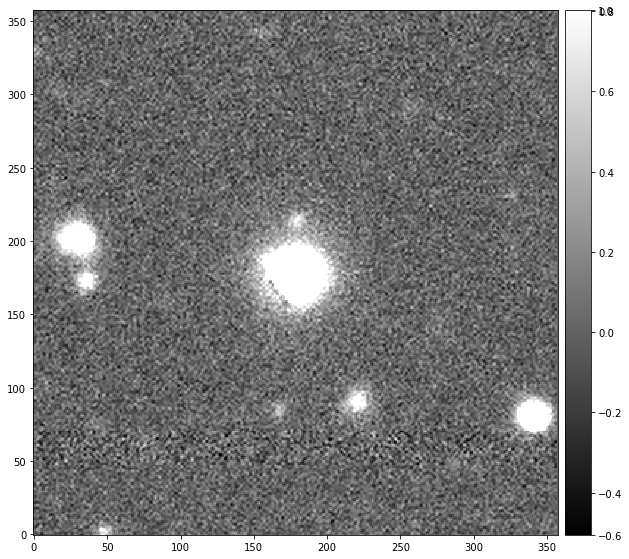

In [8]:
afwDisplay.setDefaultBackend('matplotlib')
fig, ax = plt.subplots(figsize=(10, 10))
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.setMaskTransparency(100) # if you want mask, make the transparency to 80

# for key in display.getMaskPlaneColor().keys():
#     display.setMaskPlaneColor(key, 'IGNORE')
# display.setMaskPlaneColor('NO_DATA', 'cyan')
# display.setMaskPlaneColor('DETECTED', 'blue')

display.mtv(mer_imgs[0])

In [19]:
from musulsb.butler import TigerButler

In [30]:
ls /tigress/HSC/DR/s20a_wide/

In [31]:
butler = TigerButler(log_level='debug', rerun_path='/tigress/HSC/DR/s18a_wide/' )
def load_cutout ( ra, dec, z=None, r_phys=None, r_ang=None, **kwargs):
    
    if (not r_ang is None) and (not r_phys is None):
        raise Exception ('Cannot define both angular and physical radius!')
    if r_phys is not None:  
        radius = r_phys * u.kpc
        width = 2 * u.radian * radius / cosmo.angular_diameter_distance(z).to('kpc')
    elif r_ang is not None:
        if hasattr (r_ang, 'unit'):
            width = r_ang.to('rad')
        else:
            width = r_ang * u.rad

    mbi = butler.fetch_cutout(ra, dec, width,**kwargs)
    return mbi

In [32]:
mbi = load_cutout ( ra, dec, r_ang = half_size )

DEBUG: Making g-band cutout [musulsb.butler]


ConstructorError: while constructing a Python object
cannot find module 'lsst.obs.hsc.hscMapper' (No module named 'lsst.obs.hsc.hscMapper')
  in "/tigress/HSC/DR/s18a_wide/repositoryCfg.yaml", line 2, column 10

### Display colored image

Have to download HSC images

In [18]:
from unagi import hsc
from unagi.task import hsc_cutout
from astropy.coordinates import SkyCoord

s20a = hsc.Hsc(dr='pdr2', rerun='pdr2_wide')

Public Data Release Username :  kadofong@local
Password :  ········································


# Get table list from /tigress/kadofong/envs/merian/lib/python3.10/site-packages/unagi/data/pdr2_wide/pdr2_wide_tables.fits


In [19]:
hsc_imgs = hsc_cutout(SkyCoord(ra, dec, frame='icrs', unit='deg'), 
                        cutout_size=half_size, # - 0.02 * u.arcsec, 
                        filters='griz', archive=s20a, 
                        use_saved=False, output_dir='./', 
                        verbose=True, 
                        save_output=False)

# Will dgenerate cutouts for a list of filters: ['g', 'r', 'i', 'z']
# Retrieving cutout image in filter: g
# Retrieving cutout image in filter: r
# Retrieving cutout image in filter: i
# Retrieving cutout image in filter: z


In [20]:
from carpenter.cutout import padding_img

In [24]:
mer_size = merian_cutouts[0].getImage().array.shape

AttributeError: 'list' object has no attribute 'getImage'

In [235]:
imgs = [item[1].data for item in hsc_imgs]
mer_size = imgs[0].shape
imgs += [padding_img(item.getImage().array, output_size=(mer_size)) for item in mer_imgs]

In [234]:
imgs = [padding_img(item[1].data, output_size=(mer_size)) for item in hsc_imgs]
imgs += [item.getImage().array for item in mer_imgs]

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/projects/HSC/LSST/stack_20220527/conda/envs/lsst-scipipe-4.0.0/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_249857/2473476326.py", line 1, in <cell line: 1>
    imgs = [padding_img(item[1].data, output_size=(mer_size)) for item in hsc_imgs]
  File "/tmp/ipykernel_249857/2473476326.py", line 1, in <listcomp>
    imgs = [padding_img(item[1].data, output_size=(mer_size)) for item in hsc_imgs]
  File "/home/jiaxuanl/Research/Merian/carpenter/src/carpenter/cutout.py", line 339, in padding_img
    temp = np.pad(
  File "<__array_function__ internals>", line 5, in pad
  File "/projects/HSC/LSST/stack_20220527/conda/envs/lsst-scipipe-4.0.0/lib/python3.10/site-packages/numpy/lib/arraypad.py", line 743, in pad
    pad_width = _as_pairs(pad_width, array.ndim, as_index=True)
  File "/projects/HSC/LSST/stack_20220527/conda/envs/lsst-scipi

In [236]:
for i in range(len(imgs)):
    print(imgs[i].shape)

(359, 358)
(359, 358)
(359, 358)
(359, 358)
(358, 358)
(358, 358)


In [237]:
imgs = np.array(imgs)

In [238]:
from carpenter.display import display_merian_cutout_rgb

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

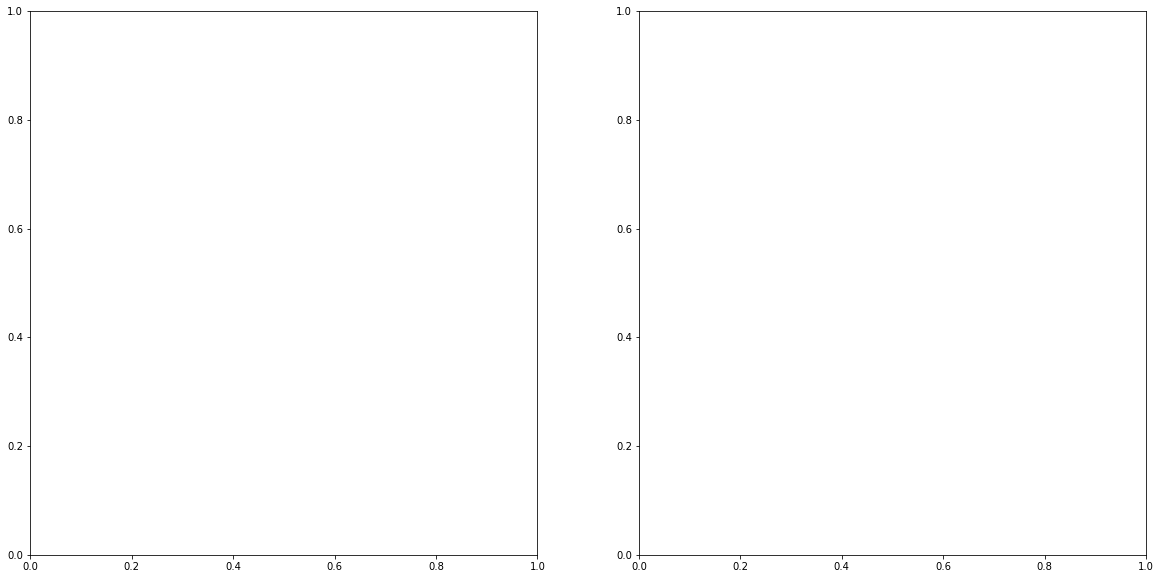

In [239]:
color_norm = {'g': 1.9, 'r': 1.2, 'i': 1.0,
              'z': 0.85, 'y': 0.5, 'N708': 1.1, 'N540': 1.5}

fig, [ax1, ax2] = plt.subplots(1, 2, figsize=(20, 10))

_, img_rgb = display_merian_cutout_rgb(imgs, filters=list('griz') + ['N708', 'N540'], 
                          ax=ax1, color_norm=color_norm, 
                          channel_map=None, N708_strength=3);

ax1.set_title('HSC griz + Merian N708', fontsize=25)

_img = imgs[0:4]
_, _ = display_merian_cutout_rgb(_img, filters=list('griz'), ax=ax2, 
                                       color_norm=color_norm,
                                       channel_map=None);

ax2.set_title('HSC griz', fontsize=25)